IT IS A VEHICLE DATASET FROM CARDEKHO [KAGGLE]

USING THIS DATASET OUR MAIN AIM IS TO PREDICT THE SELLING PRICE OF A CAR BASED ON THE PRESENT PRICE AND SOME DEPRECIATION
[HOW MUCH EXTENT IT IS ALREADY BEEN USED] PROPERTIES.


## 1.DATA COLLECTION

In [127]:
#IMPORTING THE REQUIRED LIBRARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [128]:
car_data=pd.read_csv('car data.csv') # READING THE DATA FROM CSV FILE
car_data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


## 2. EXPLORATORY DATA ANALYSIS

In [129]:
car_data.columns   #list of features we have. 

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [130]:
car_data.info()  # feature analysis

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [131]:
car_data.describe() #statistical analysis

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


c:\users\dell\anaconda3\envs\carprediction\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
c:\users\dell\anaconda3\envs\carprediction\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
c:\users\dell\anaconda3\envs\carprediction\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretati

<AxesSubplot:xlabel='Transmission', ylabel='count'>

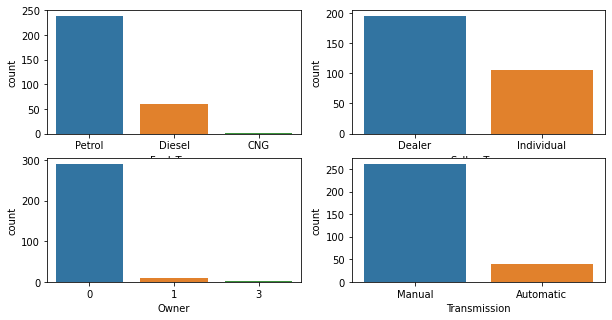

In [132]:
# lets analyze categorical features
plt.figure(figsize=(10,5))

plt.subplot(2,2,1)
sb.countplot(car_data['Fuel_Type'])

plt.subplot(2,2,2)
sb.countplot(car_data['Seller_Type'])

plt.subplot(2,2,3)
sb.countplot(car_data['Owner'])

plt.subplot(2,2,4)
sb.countplot(car_data['Transmission'])

lets look for outliers in numerical data

c:\users\dell\anaconda3\envs\carprediction\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
c:\users\dell\anaconda3\envs\carprediction\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
c:\users\dell\anaconda3\envs\carprediction\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretati

<AxesSubplot:xlabel='Kms_Driven'>

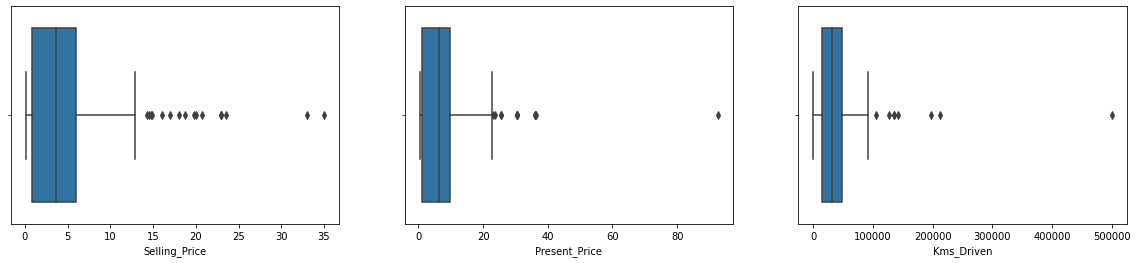

In [133]:
# lets analyze numerical features
plt.figure(figsize=(20,4))

plt.subplot(1,3,1)
sb.boxplot(car_data['Selling_Price'])

plt.subplot(1,3,2)
sb.boxplot(car_data['Present_Price'])

plt.subplot(1,3,3)
sb.boxplot(car_data['Kms_Driven'])


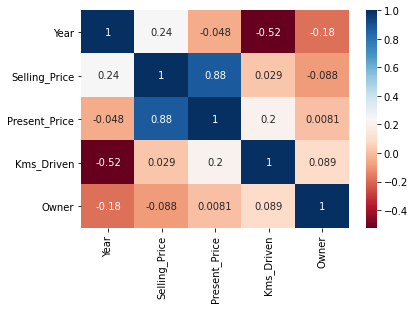

In [134]:
#lets do bivariate analysis
sb.heatmap(car_data.corr(), annot=True, cmap="RdBu")
plt.show()

#### here selling price and present_price are highly correlated

In [135]:
#lets see pivot tables
car_data.pivot_table(values='Selling_Price',index='Seller_Type',columns="Fuel_Type")

Fuel_Type,CNG,Diesel,Petrol
Seller_Type,,,
Dealer,3.1,10.181525,5.252388
Individual,NaN,16.000000,0.726857


In [136]:
car_data.pivot_table(values='Selling_Price', index = 'Seller_Type', columns= 'Transmission')

Transmission,Automatic,Manual
Seller_Type,,
Dealer,12.246552,5.756506
Individual,1.968182,0.743895


# 3. FEATURE ENGINEERING

Here if we observe each and every feature, 
1. there is no use of car_name because of its unique names.
2. Year -> year at which the car was bought. As we need to find its selling price presently lets find it's age [present_year - year]. 

In [137]:
car_data["Car_Age"]=2020-car_data['Year']
car_data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Car_Age
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,6
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,7
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,3
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,9
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,6


we got the age of the car, there is no need of year and car_name, so lets drop it

In [138]:
car_data.drop(['Car_Name','Year'],axis=1,inplace=True)

In [139]:
car_data.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Car_Age
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,6
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,7
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,3
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,9
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,6


### LETS HANDLE CATEGORICAL FEATURES

In [140]:
#one hot encoding
cars_data=pd.get_dummies(car_data,drop_first=True)

In [141]:
cars_data.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,Car_Age,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,6,0,1,0,1
1,4.75,9.54,43000,0,7,1,0,0,1
2,7.25,9.85,6900,0,3,0,1,0,1
3,2.85,4.15,5200,0,9,0,1,0,1
4,4.60,6.87,42450,0,6,1,0,0,1


### lets handle numerical features by removing outliers

c:\users\dell\anaconda3\envs\carprediction\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\dell\anaconda3\envs\carprediction\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\dell\anaconda3\envs\carprediction\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level functio

<AxesSubplot:xlabel='Kms_Driven', ylabel='Density'>

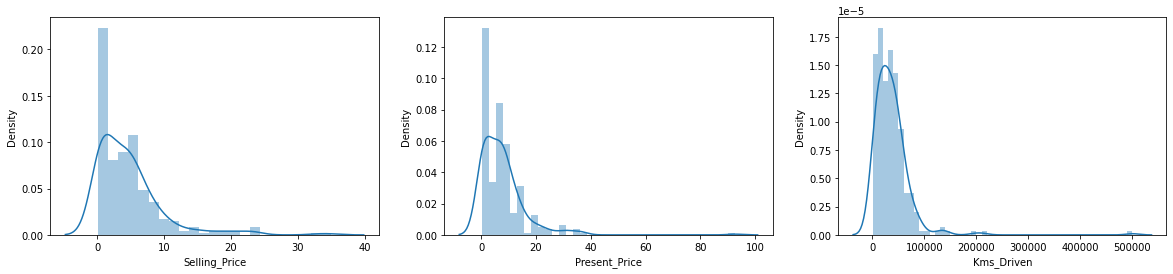

In [142]:
# lets see the distibution of numerical features
# lets analyze numerical features
plt.figure(figsize=(20,4))
plt.subplot(1,3,1)
sb.distplot(car_data['Selling_Price'])
plt.subplot(1,3,2)
sb.distplot(car_data['Present_Price'])
plt.subplot(1,3,3)
sb.distplot(car_data['Kms_Driven'])


c:\users\dell\anaconda3\envs\carprediction\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
c:\users\dell\anaconda3\envs\carprediction\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
c:\users\dell\anaconda3\envs\carprediction\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretati

<AxesSubplot:xlabel='Kms_Driven'>

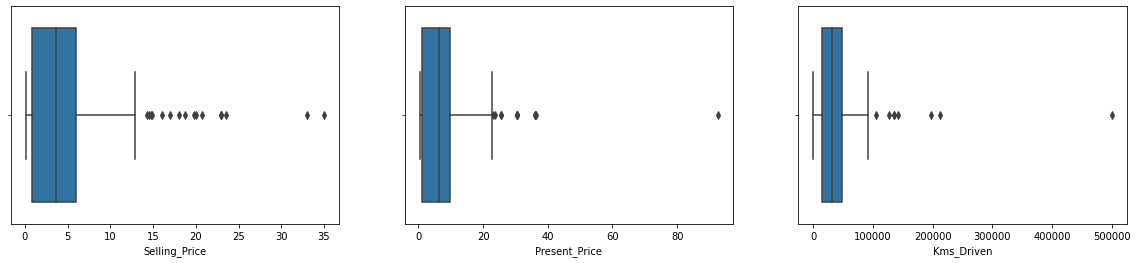

In [143]:
plt.figure(figsize=(20,4))
plt.subplot(1,3,1)
sb.boxplot(car_data['Selling_Price'])
plt.subplot(1,3,2)
sb.boxplot(car_data['Present_Price'])
plt.subplot(1,3,3)
sb.boxplot(car_data['Kms_Driven'])


In [144]:
# since these 3 features are following normal distribution approximately, lets handle the outliers by removing points at 3rd standard devaition
upper_band_presentprice=cars_data['Present_Price'].mean()+3*cars_data['Present_Price'].std()
upper_band_kmsdriven=cars_data['Kms_Driven'].mean()+3*cars_data['Kms_Driven'].std()
upper_band_sp=cars_data['Selling_Price'].mean()+3*cars_data['Selling_Price'].std()
print(upper_band_presentprice)
print(upper_band_kmsdriven)
print(upper_band_sp)

33.56081796684471
153607.8576262701
19.909730349596533


In [145]:
#lets look at outliers
cars_data[cars_data['Present_Price']>33.5]
# here if we observe the prices are very expensive.

,Selling_Price,Present_Price,Kms_Driven,Owner,Car_Age,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
59,19.99,35.96,41000,0,6,1,0,0,0
62,18.75,35.96,78000,0,6,1,0,0,0
63,23.50,35.96,47000,0,5,1,0,0,0
64,33.00,36.23,6000,0,3,1,0,0,0
86,35.00,92.60,78000,0,10,1,0,0,1


In [146]:
cars_data[cars_data['Kms_Driven']>153607]

,Selling_Price,Present_Price,Kms_Driven,Owner,Car_Age,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
84,3.49,13.46,197176,0,15,1,0,0,1
179,0.31,1.05,213000,0,10,0,1,1,1
196,0.17,0.52,500000,0,12,0,1,1,0


In [147]:
cars_data[cars_data['Selling_Price']>19.9]

,Selling_Price,Present_Price,Kms_Driven,Owner,Car_Age,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
51,23.00,30.61,40000,0,5,1,0,0,0
59,19.99,35.96,41000,0,6,1,0,0,0
63,23.50,35.96,47000,0,5,1,0,0,0
64,33.00,36.23,6000,0,3,1,0,0,0
82,23.00,25.39,15000,0,3,1,0,0,0
86,35.00,92.60,78000,0,10,1,0,0,1
93,23.00,30.61,40000,0,5,1,0,0,0
96,20.75,25.39,29000,0,4,1,0,0,0


### now we detected outliers lets remove it

In [148]:
cars_data1=cars_data[cars_data['Kms_Driven']<153607]

In [149]:
cars_data1=cars_data1[cars_data1['Selling_Price']<19.9]

HERE WE REMOVED THE OUTLIERS

# 4. DATA PREPARATION 

### REMEMBER THAT cars_data1 is outlier removed data, cars_data is original data
lets see all possibilities

In [150]:
x=cars_data1.iloc[:,1:]
y=cars_data1.iloc[:,0]

In [151]:
x.head()

,Present_Price,Kms_Driven,Owner,Car_Age,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,5.59,27000,0,6,0,1,0,1
1,9.54,43000,0,7,1,0,0,1
2,9.85,6900,0,3,0,1,0,1
3,4.15,5200,0,9,0,1,0,1
4,6.87,42450,0,6,1,0,0,1


In [152]:
y.head()

0    3.35
1    4.75
2    7.25
3    2.85
4    4.60
Name: Selling_Price, dtype: float64

In [153]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [154]:
len(x_train)

203

In [155]:
len(x_test)

87

#### DATA TRANSFORMATION
lets do standarization and normalization, and understand which transformation is good for our model

In [156]:
#NORMAILIZATION
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler()
x_normal_train=sc.fit_transform(x_train)
x_normal_test=sc.transform(x_test)

In [157]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_stand_train=sc.fit_transform(x_train)
x_stand_test=sc.transform(x_test)

# MODEL BUILDING

lets see following models including hyperparameter tuning
1. LINEAR REGRESSION
2. LASSO REGRESSION
3. RIDGE REGRESSION
4. DECISION TREE REGRESSOR
5. RANDOMFOREST REGRESSOR
6. GRADIENTBOOSTING REGRESSOR [XGBOOST]
7. SVM


NOTE: XGBoost is more regularized form of Gradient Boosting. XGBoost uses advanced regularization (L1 & L2), which improves model generalization capabilities. XGBoost delivers high performance as compared to Gradient Boosting. Its training is very fast and can be parallelized / distributed across clusters.

## LINEAR REGRESSION

#### lets create the generalized function, for model fitting,prediction and valuation

In [158]:
from sklearn.metrics import r2_score,mean_squared_error
import pickle 

r2_train_score=[]
r2_test_score=[]
mse=[]

def generalized_model(model,train_x,test_x,train_y,test_y,filename):
    
    # FITTING THE MODEL
    model.fit(train_x,train_y)
    
    #PREDICTING THE TRAIN DATA TO SEE WHETHER THE MODEL IS OVERFIT OR NOT
    y_pred=model.predict(train_x)
    R2_train_model=r2_score(train_y,y_pred)
    r2_train_score.append(round(R2_train_model,2))

    #PREDICTING THE TEST DATA TO SEE THE MODEL'S ACCURACY
    y_pred=model.predict(test_x)
    R2_test_model=r2_score(test_y,y_pred)
    r2_test_score.append(round(R2_test_model,2))
    
    mse_error=mean_squared_error(test_y,y_pred)
    mse.append(mse_error)
    # MODEL EVALUATION
    print("Train R2-score :",round(R2_train_model,2))
    print("Test R2-score :",round(R2_test_model,2))
    print("mean sqauared error:",round(mse_error,2))
  
    plt.figure(figsize=(20,4))
    plt.subplot(1,2,1)
    sb.distplot(test_y-y_pred)  #checking the distribution
    plt.subplot(1,2,2)
    plt.scatter(test_y,y_pred)    # checking scatter plot 
    
    plt.show()
    
    file=open(filename,'wb')
    pickle.dump(model,file)
    file.close()
    
    return model

In [159]:
print(x_normal_train.shape)
print(x_normal_test.shape)
print(y_train.shape)
print(y_test.shape)

(203, 8)
(87, 8)
(203,)
(87,)


In [160]:
from sklearn.linear_model import LinearRegression

Train R2-score : 0.88
Test R2-score : 0.82
mean sqauared error: 1.99


c:\users\dell\anaconda3\envs\carprediction\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


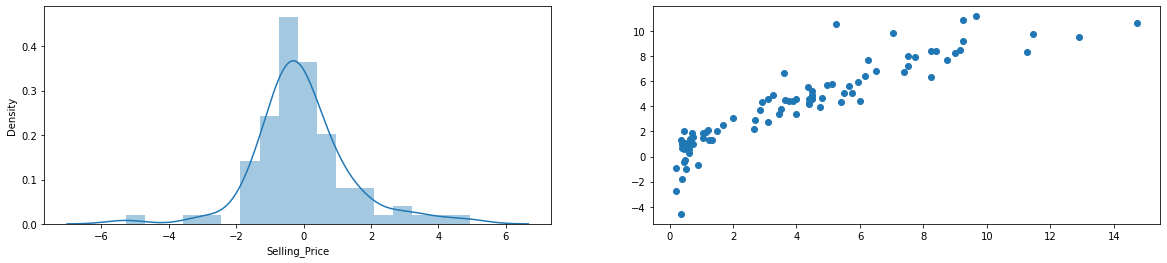

In [161]:
lr=LinearRegression()
model=generalized_model(lr,x_normal_train,x_normal_test,y_train,y_test,'lr_normal.pkl')  # using normalized data

Train R2-score : 0.88
Test R2-score : 0.82
mean sqauared error: 1.99


c:\users\dell\anaconda3\envs\carprediction\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


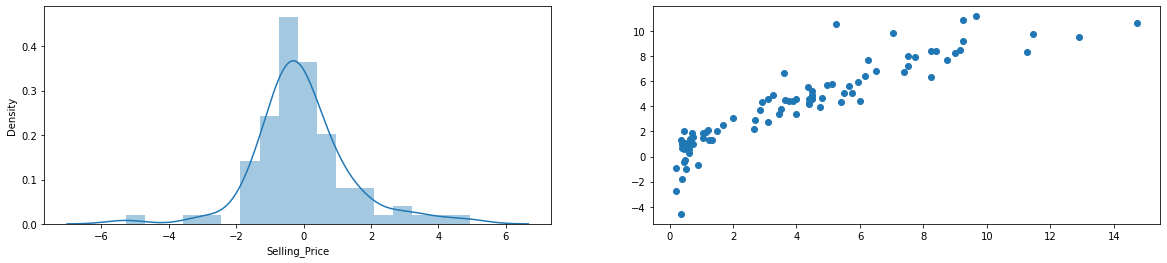

In [162]:
lr1=LinearRegression()
model=generalized_model(lr1,x_stand_train,x_stand_test,y_train,y_test,'lr_std.pkl')  # using standard data

#### FROM ABOVE THERE IS NO MUCH DIFFERENCE IN ACCURACY BETWEEN NORMALIZED AND STANDARD DATA

## LASSO REGRESSION 

In [163]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

In [164]:
params={'alpha':[1e-2,1e-1,1,10],
       'selection':['cyclic','random']}

Train R2-score : 0.88
Test R2-score : 0.83
mean sqauared error: 1.88


c:\users\dell\anaconda3\envs\carprediction\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


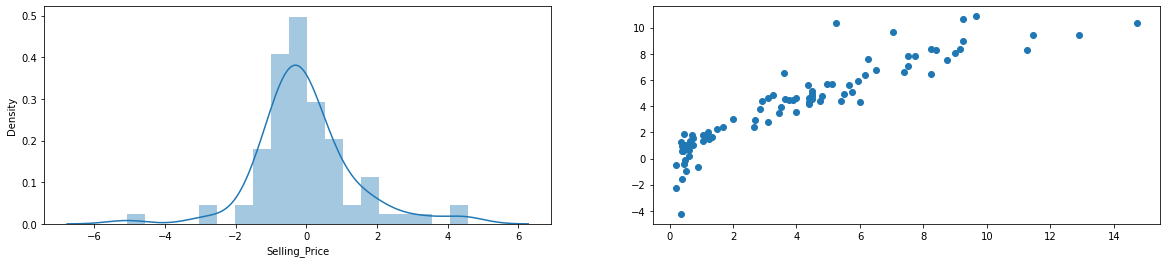

In [165]:
lasso=Lasso()
model=GridSearchCV(lasso,params,scoring='r2',cv=5)
fitted_model=generalized_model(model,x_normal_train,x_normal_test,y_train,y_test,'lasso_normal.pkl')

Train R2-score : 0.88
Test R2-score : 0.82
mean sqauared error: 1.97


c:\users\dell\anaconda3\envs\carprediction\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


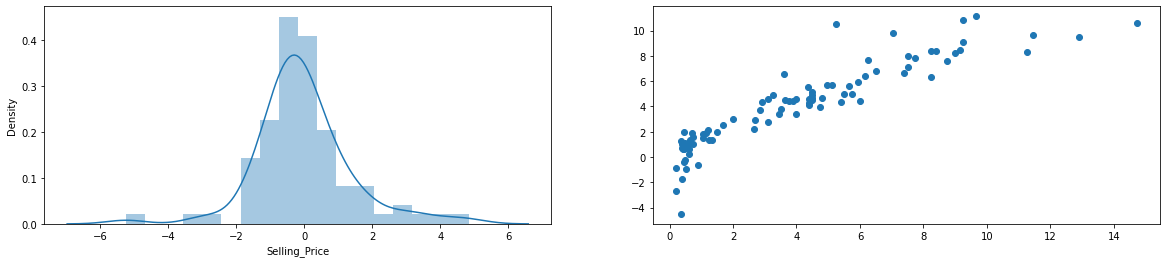

In [166]:
lasso=Lasso()
model=GridSearchCV(lasso,params,scoring='r2',cv=5)
fitted_model=generalized_model(model,x_stand_train,x_stand_test,y_train,y_test,'lasso_std.pkl')

#### FORM ABOVE IF WE OBSERVE THERE IS SOME SLIGHT DIFFERENCE IN TEST ACCURACY BETWEEN NORMALIZED AND STANDARD DATA. HERE NORMALIZED DATA HAS WORKED GOOD.

## RIDGE REGRESSION

In [167]:
from sklearn.linear_model import Ridge

Train R2-score : 0.88
Test R2-score : 0.83
mean sqauared error: 1.95


c:\users\dell\anaconda3\envs\carprediction\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


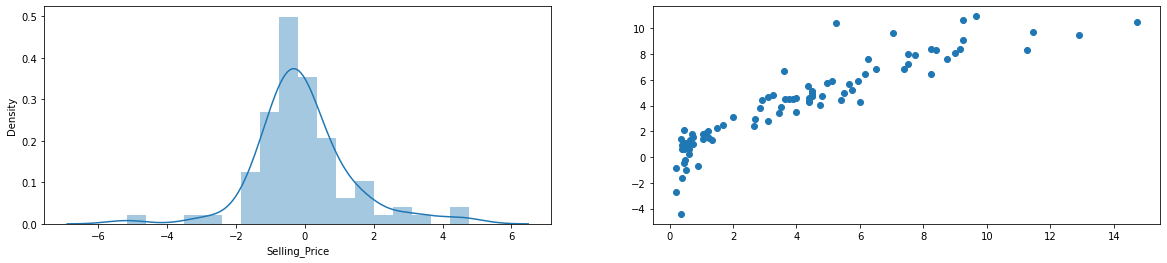

In [168]:
ridge=Ridge()
params={'alpha':[1e-2,1e-1,1,10]}
model=GridSearchCV(ridge,params,scoring='r2',cv=5)
fitted_model=generalized_model(model,x_normal_train,x_normal_test,y_train,y_test,'ridge_normal.pkl')

Train R2-score : 0.88
Test R2-score : 0.82
mean sqauared error: 1.98


c:\users\dell\anaconda3\envs\carprediction\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


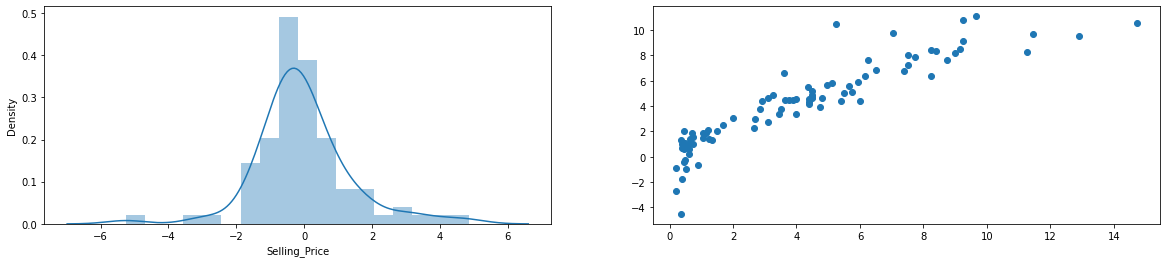

In [169]:
ridge=Ridge()
params={'alpha':[1e-2,1e-1,1,10]}
model=GridSearchCV(ridge,params,scoring='r2',cv=5)
fitted_model=generalized_model(model,x_stand_train,x_stand_test,y_train,y_test,'ridge_std.pkl')

## DecisionTreeRegressor

In [170]:
from sklearn.tree import DecisionTreeRegressor

REMEBER THAT THERE IS NO NEED OF NORMAIZATION AND STANDARDINZATION FOR DECISION TREES

Train R2-score : 1.0
Test R2-score : 0.76
mean sqauared error: 2.64


c:\users\dell\anaconda3\envs\carprediction\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


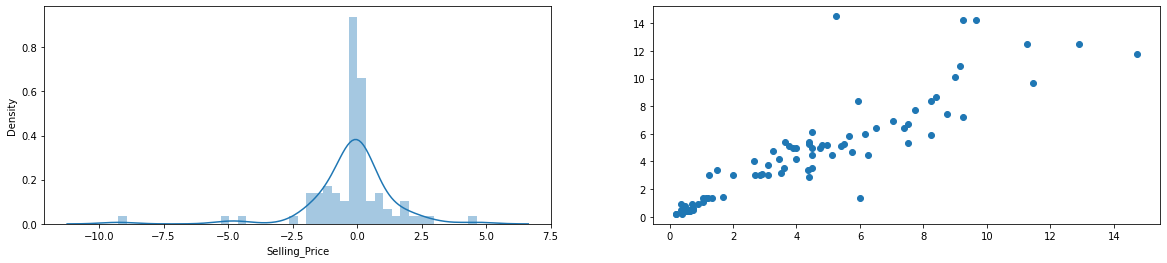

In [171]:
model=DecisionTreeRegressor()
fitted_model=generalized_model(model,x_train,x_test,y_train,y_test,'dt.pkl') 

HERE THE MODEL HAS GOT OVERFITTED

## DecisionTreeRegressor HyperparameterTuning

Fitting 5 folds for each of 4800 candidates, totalling 24000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:   11.3s
[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:   13.6s
[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed:   17.6s
[Parallel(n_jobs=-1)]: Done 496 tasks      | elapsed:   22.4s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:   29.1s
[Parallel(n_jobs=-1)]: Done 1136 tasks      | elapsed:   37.5s
[Parallel(n_jobs=-1)]: Done 1552 tasks      | elapsed:   47.1s
[Parallel(n_jobs=-1)]: Done 2032 tasks      | elapsed:   58.3s
[Parallel(n_jobs=-1)]: Done 2576 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 3184 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 3856 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 4592 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 5392 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 6256 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 7184 tasks      | e

Train R2-score : 0.53
Test R2-score : 0.65
mean sqauared error: 3.87


c:\users\dell\anaconda3\envs\carprediction\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


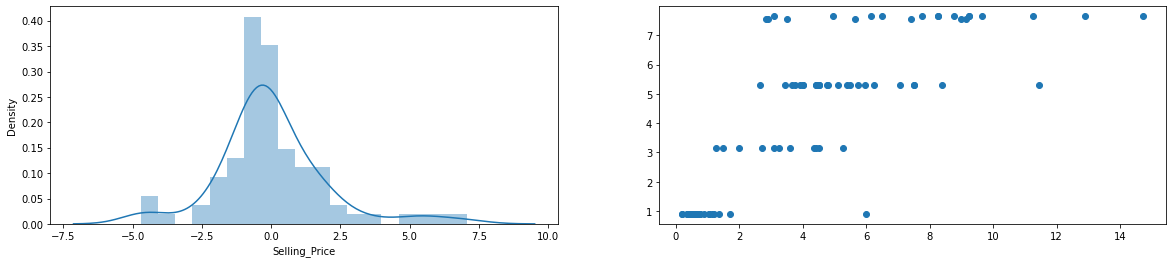

In [172]:
model=DecisionTreeRegressor()
params={
    'criterion' : ['mse'],
    'splitter' : ['best','random'],
    'max_depth' : [3,4,5,6,8,10],
    'min_samples_leaf' : [1,2,3,4,5],  
    'min_weight_fraction_leaf':[0.1,0.2,0.3,0.4],
    'max_features' : [None,"auto", "sqrt", "log2"],
    'max_leaf_nodes' : [10,20,30,40,50]
    
}
model=GridSearchCV(model,params,scoring='r2',cv=5,verbose=3,n_jobs=-1)
fitted_model=generalized_model(model,x_train,x_test,y_train,y_test,'dt_ht.pkl')

## RandomForestRegressor

Train R2-score : 0.99
Test R2-score : 0.93
mean sqauared error: 0.8


c:\users\dell\anaconda3\envs\carprediction\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


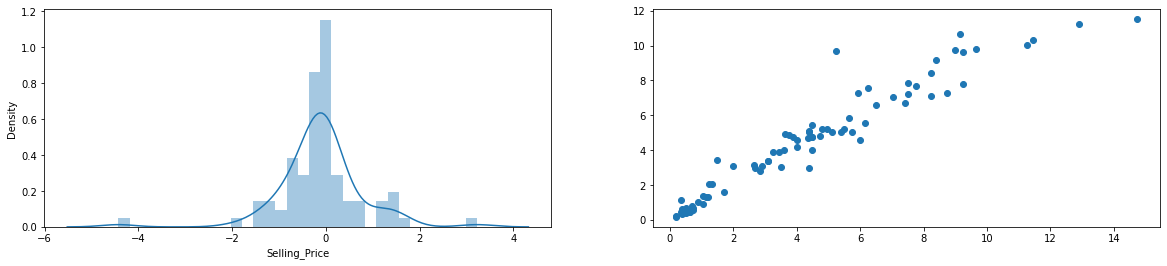

In [173]:
from sklearn.ensemble import RandomForestRegressor
regressor=RandomForestRegressor()
fitted_model=generalized_model(regressor,x_train,x_test,y_train,y_test,'rf.pkl')

## RandomForestRegressor hyperparamoptimization

In [174]:
from sklearn.model_selection import RandomizedSearchCV

In [175]:
n_estimators=[int(x) for x in np.linspace(start=100,stop=1200,num=12)]
max_features=['auto','sqrt']
max_depth=[int(x) for x in np.linspace(start=5,stop=30,num=6)]
min_sample_split=[2,5,10,15,100]

min_samples_leaf=[1,2,5,10]

In [176]:
params={'n_estimators': n_estimators,
       'max_features': max_features,
        'max_depth': max_depth,
        'min_samples_split': min_sample_split,
        'min_samples_leaf': min_samples_leaf
       }

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    7.8s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   45.6s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:  2.7min finished


Train R2-score : 0.98
Test R2-score : 0.92
mean sqauared error: 0.95


c:\users\dell\anaconda3\envs\carprediction\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


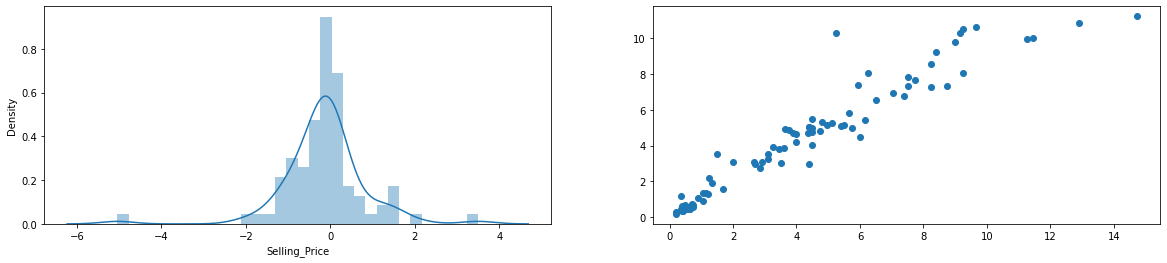

In [177]:
reg=RandomForestRegressor()
modelrf_rscv=RandomizedSearchCV(reg,params,scoring='r2',n_iter=100,cv=5,verbose =2,n_jobs=-1,random_state=0)
fitted_model=generalized_model(modelrf_rscv,x_train,x_test,y_train,y_test,'rf_ht.pkl')

In [178]:
fitted_model.best_params_

{'n_estimators': 1200,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 25}

## xgboost regressor

In [179]:
#!conda install -c anaconda py-xgboost
import xgboost as xg

[14:03:42] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Train R2-score : 0.99
Test R2-score : 0.89
mean sqauared error: 1.27


c:\users\dell\anaconda3\envs\carprediction\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


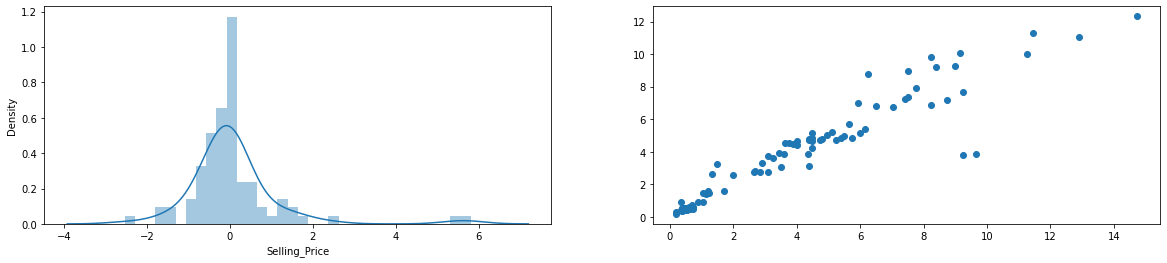

In [180]:
reg1=xg.XGBRegressor()
fitted_model=generalized_model(reg1,x_train,x_test,y_train,y_test,'xgb.pkl')

## Xgboost regresor hyperparameter optimization

In [181]:
from sklearn.model_selection import RandomizedSearchCV

In [182]:
n_estimators=[int(x) for x in np.linspace(start=100,stop=1200,num=12)]
learning_rate=['0.05','0.1','0.2','0.3','0.4','0.5']
max_depth=[int(x) for x in np.linspace(start=5,stop=30,num=6)]
subsample=[0.7,0.8,0.6]
min_child_weight=[3,4,5,6,7]


In [183]:
random_grid={
    'n_estimators' : n_estimators,
    'learning_rate':learning_rate,
    'max_depth':max_depth,
    'subsample':subsample,
    'min_child_weight':min_child_weight
}

Fitting 8 folds for each of 100 candidates, totalling 800 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   16.4s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:   36.7s
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  1.0min


[14:05:21] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[Parallel(n_jobs=-1)]: Done 800 out of 800 | elapsed:  1.3min finished


Train R2-score : 1.0
Test R2-score : 0.89
mean sqauared error: 1.21


c:\users\dell\anaconda3\envs\carprediction\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


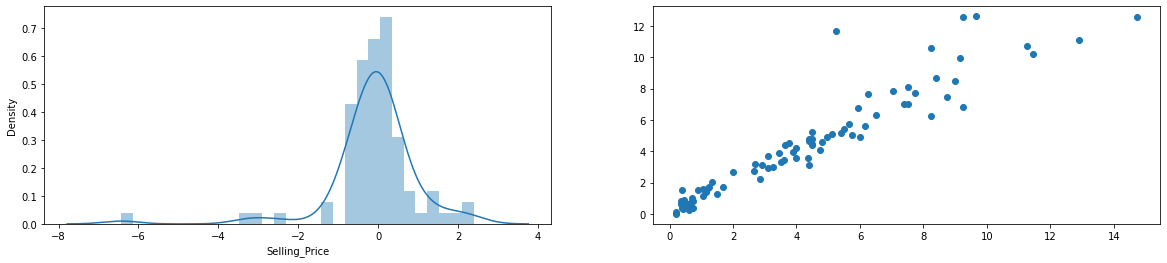

In [184]:
reg=xg.XGBRegressor()
modelxgb_rscv=RandomizedSearchCV(reg,random_grid,scoring='r2',n_iter=100,cv=8,verbose =2,n_jobs=-1,random_state=0)
fitted_model=generalized_model(modelxgb_rscv,x_train,x_test,y_train,y_test,'xgb_ht.pkl')

#### xgboost regressor is the most efficient regressor for our dataset

## SUPPORT VECTOR REGRESSOR

In [185]:
from sklearn.svm import SVR

## SUPPORT VECTOR REGRESSOR WITH HYPERPARAMETERTUNING

Train R2-score : 0.98
Test R2-score : 0.95
mean sqauared error: 0.52


c:\users\dell\anaconda3\envs\carprediction\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


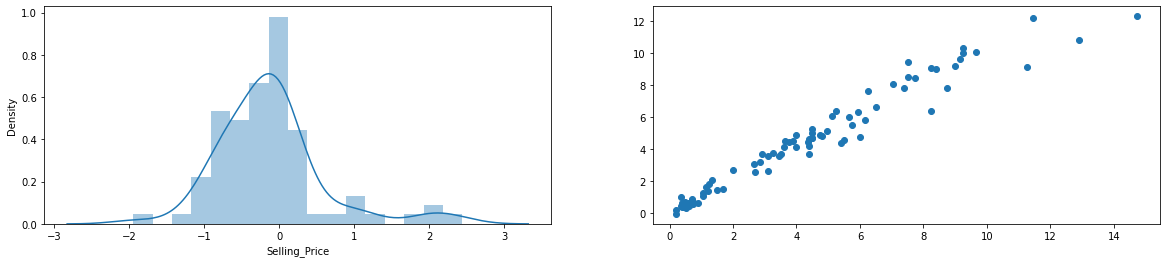

In [186]:
params={'C': [0.01,0.1,10,100]}
model=SVR()
mod=GridSearchCV(model,params,scoring='r2',cv=5)
fitted_model=generalized_model(mod,x_normal_train,x_normal_test,y_train,y_test,'svr_normal.pkl')

In [187]:
fitted_model.best_params_

{'C': 100}

Train R2-score : 0.99
Test R2-score : 0.91
mean sqauared error: 1.03


c:\users\dell\anaconda3\envs\carprediction\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


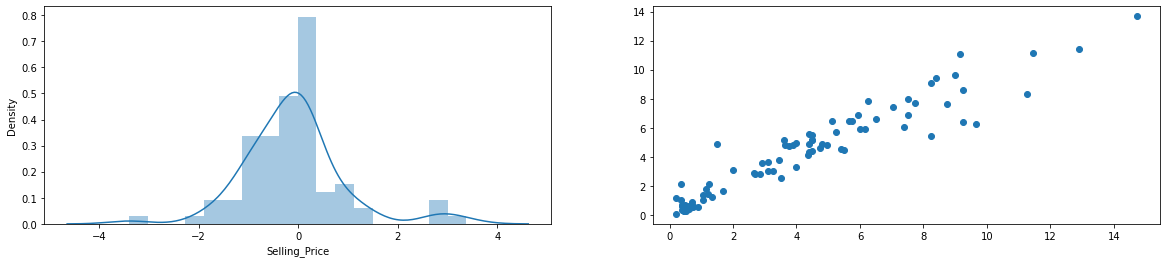

In [188]:
params={'C': [0.01,0.1,10,100]}
model=SVR()
mod=GridSearchCV(model,params,scoring='r2',cv=5)
fitted_model=generalized_model(mod,x_stand_train,x_stand_test,y_train,y_test,'svr_std.pkl')

#### SUPPORT VECTOR MACHINE WITH NORMAILIZED DATA HAS OUTPERFORMED ALL THE MODELS

In [189]:
print(r2_train_score)
print(r2_test_score)
print(mse)


[0.88, 0.88, 0.88, 0.88, 0.88, 0.88, 1.0, 0.53, 0.99, 0.98, 0.99, 1.0, 0.98, 0.99]
[0.82, 0.82, 0.83, 0.82, 0.83, 0.82, 0.76, 0.65, 0.93, 0.92, 0.89, 0.89, 0.95, 0.91]
[1.9920050947438126, 1.9920050947438124, 1.8804083287305051, 1.972021455442053, 1.9540453456794988, 1.9798124812933002, 2.635127586206897, 3.8743557006712765, 0.7950015282758615, 0.9483016648334266, 1.2702432513279645, 1.213666102184456, 0.5244472066117761, 1.026740037453821]


In [190]:
TECHNIQUES=['LINEAR_REGRESSION_NORMAL','LINEAR_REGRESSION_STD','LASSO_NORMAL','LASSO_STD','RIDGE_NORMAL','RIDGE_STD','DECISIONTREE_REGRESSOR','DECISIONTREE_REGRESSOR_HT','RANDOMFOREST_REGRESSOR','RANDOMFOREST_REGRESSOR_HT','XGBOOST_REGRESSOR','XGBOOST_REGRESSOR_HT','SVR_NORMAL','SVR_STD']


# ALL MODEL EVALUATION SCORES

In [191]:
results=pd.DataFrame({'MODELS':TECHNIQUES,'R2_TRAIN_SCORE':r2_train_score,'R2_TEST_SCORE':r2_test_score,'MEAN_SQUARED_ERROR':mse})
results

,MODELS,R2_TRAIN_SCORE,R2_TEST_SCORE,MEAN_SQUARED_ERROR
0,LINEAR_REGRESSION_NORMAL,0.88,0.82,1.992005
1,LINEAR_REGRESSION_STD,0.88,0.82,1.992005
2,LASSO_NORMAL,0.88,0.83,1.880408
3,LASSO_STD,0.88,0.82,1.972021
4,RIDGE_NORMAL,0.88,0.83,1.954045
5,RIDGE_STD,0.88,0.82,1.979812
6,DECISIONTREE_REGRESSOR,1.00,0.76,2.635128
7,DECISIONTREE_REGRESSOR_HT,0.53,0.65,3.874356
8,RANDOMFOREST_REGRESSOR,0.99,0.93,0.795002
9,RANDOMFOREST_REGRESSOR_HT,0.98,0.92,0.948302


# CONCLUSION

#### SUPPORT VECTOR REGRESSOR WITH NORMALIZED DATA HAS WORKED WELL AND THEN RANDOMFOREST REGRESSOR.

In [196]:
x_test.head()

,Present_Price,Kms_Driven,Owner,Car_Age,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
56,7.27,40534,0,5,0,1,0,1
133,0.95,500,0,4,0,1,1,1
191,0.57,25000,1,8,0,1,1,1
221,6.79,32000,0,7,0,1,0,0
282,14.00,63000,0,6,1,0,0,1


In [197]:
y_test

56     4.50
133    0.72
191    0.20
221    4.50
282    8.25
       ... 
153    0.50
210    3.10
98     7.05
55     3.60
177    0.35
Name: Selling_Price, Length: 87, dtype: float64